In [55]:
from mxnet import image
from mxnet import nd
import sys
import os


In [56]:
abspath  =  os.getcwd()
data_dir =  str(abspath) + "/data/"
data_shape = 256
batch_size = 32
rgb_mean = nd.array([123, 117, 104])

In [61]:



def get_iterators(data_shape, batch_size):
    class_names = ['pikachu']
    num_class = len(class_names)
    train_iter = image.ImageDetIter(
        batch_size=batch_size,
        data_shape=(3, 500, 1069),
        path_imgrec =data_dir+'image_train.rec'
        #path_imgidx=data_dir+'image_train.idx',
        #shuffle=True
        #mean=True
        #rand_crop=1,
        #min_object_covered=0.95,
        #max_attempts=200
        )
    val_iter = image.ImageDetIter(
        batch_size = batch_size,
        data_shape  =(3, 500, 1069),
        path_imgrec =data_dir+'image_val.rec'
        #shuffle=False,
        #mean=True
    )
    return train_iter, val_iter, class_names, num_class

train_data, test_data, class_names, num_class = get_iterators(
    data_shape, batch_size)

In [62]:
batch = train_data.next()
print(batch)

DataBatch: data shapes: [(32, 3, 500, 1069)] label shapes: [(32, 37, 5)]


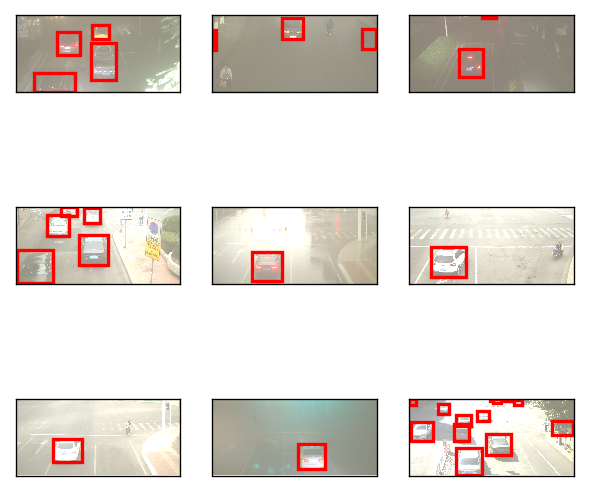

In [63]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 120
from matplotlib import pyplot as plt

def box_to_rect(box, color, linewidth=3):
    """convert an anchor box to a matplotlib rectangle"""
    box = box.asnumpy()
    return plt.Rectangle(
        (box[0], box[1]), box[2]-box[0], box[3]-box[1],
        fill=False, edgecolor=color, linewidth=linewidth)

_, figs = plt.subplots(3, 3, figsize=(6,6))
for i in range(3):
    for j in range(3):
        img, labels = batch.data[0][3*i+j], batch.label[0][3*i+j]
        
        # (3L, 256L, 256L) => (256L, 256L, 3L)
        img = img.transpose((1, 2, 0)) + rgb_mean
        img = img.clip(0,255).asnumpy()/255
        fig = figs[i][j]
        fig.imshow(img)
        for label in labels:
            
            label[1] = label[1] * 1069
            label[2] = label[2] * 500
            label[3] = label[3] * 1069
            label[4] = label[4] * 500
            rect = box_to_rect(label[1:5],'red',2)
            fig.add_patch(rect)
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)
plt.show()